In [4]:
import pandas as pd

file_path = '..\data\overall_life_satisfaction\estat_ilc_pw01_filtered_en.csv'
columns_to_include = ['geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG']

df = pd.read_csv(file_path, usecols=columns_to_include)

# (u) low reliability
# (b) break in time series
# (bu) break in time series, low reliability
#df = df[~df['OBS_FLAG'].isin(['u', 'b', 'bu'])]

df = df.drop(columns=['OBS_FLAG'])


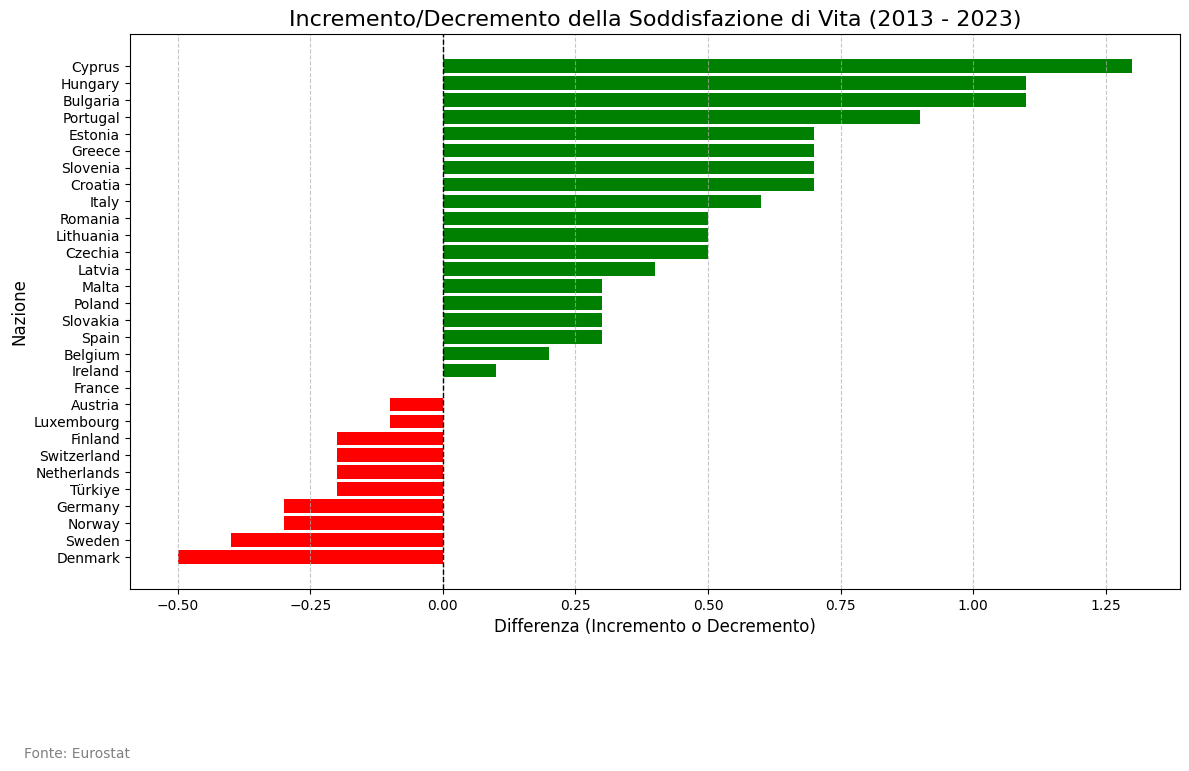

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Trova il dato più vecchio e più recente per ciascun Paese
latest_year = df['TIME_PERIOD'].max()
earliest_year = df['TIME_PERIOD'].min()

initial_values = df[df['TIME_PERIOD'] == earliest_year].set_index('geo')['OBS_VALUE']
latest_values = df[df['TIME_PERIOD'] == latest_year].set_index('geo')['OBS_VALUE']

# Calcola l'incremento/decremento
difference = latest_values - initial_values
difference = difference.dropna().sort_values()

# Creazione del grafico a barre orizzontali
plt.figure(figsize=(12, 8))
plt.barh(difference.index, difference, color=['red' if x < 0 else 'green' for x in difference])

# Configura il grafico
plt.title(f'Incremento/Decremento della Soddisfazione di Vita ({earliest_year} - {latest_year})', fontsize=16)
plt.xlabel('Differenza (Incremento o Decremento)', fontsize=12)
plt.ylabel('Nazione', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Linea verticale per zero
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Aggiunta della fonte in basso
plt.text(
    x=plt.gca().get_xlim()[0],  # Allinea la fonte all'estremità sinistra dell'asse x
    y=plt.gca().get_ylim()[0] - 10,  # Posiziona il testo leggermente sotto l'asse y
    s="Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='right'
)


plt.tight_layout()
plt.show()


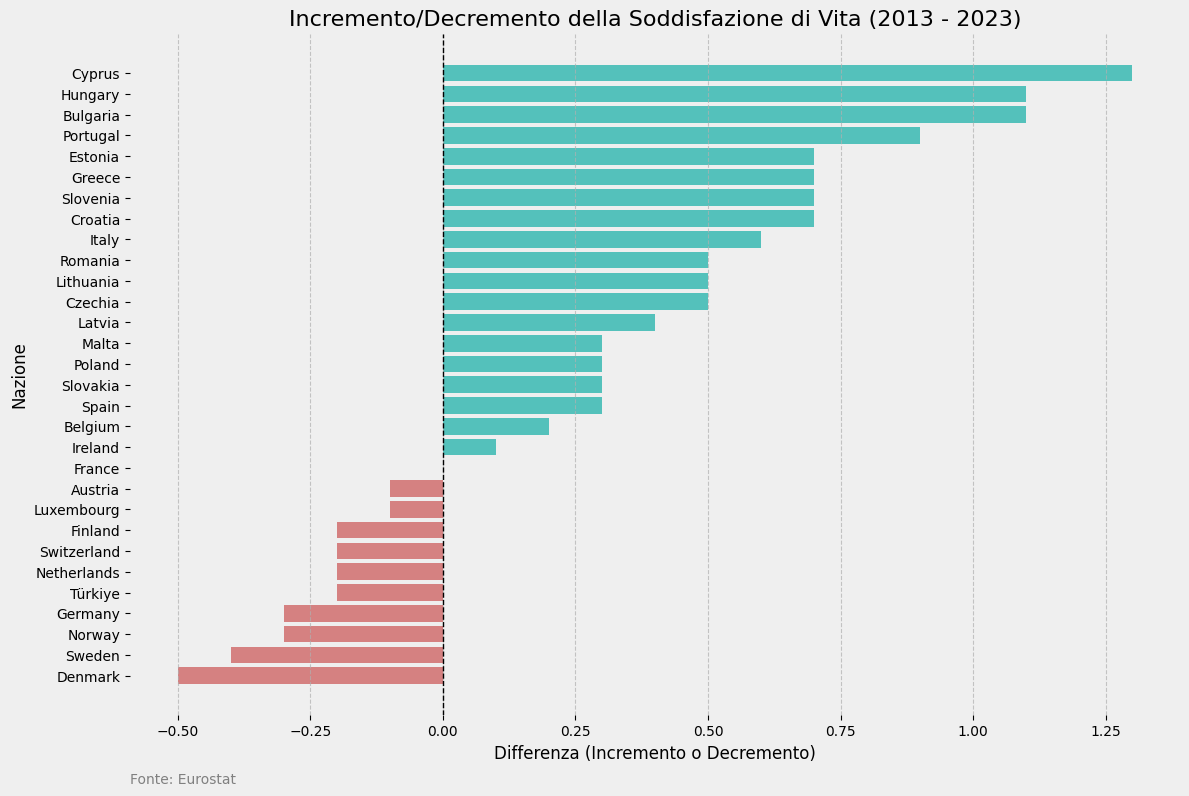

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Trova il dato più vecchio e più recente per ciascun Paese
latest_year = df['TIME_PERIOD'].max()
earliest_year = df['TIME_PERIOD'].min()

initial_values = df[df['TIME_PERIOD'] == earliest_year].set_index('geo')['OBS_VALUE']
latest_values = df[df['TIME_PERIOD'] == latest_year].set_index('geo')['OBS_VALUE']

# Calcola l'incremento/decremento
difference = latest_values - initial_values
difference = difference.dropna().sort_values()

# Colori desaturati
desaturated_red = to_rgba("indianred", alpha=0.75)  # Colore rosso desaturato
desaturated_green = to_rgba("lightseagreen", alpha=0.75)  # Colore verde/blu chiaro

# Creazione del grafico a barre orizzontali
plt.figure(figsize=(12, 8))
plt.barh(
    difference.index, 
    difference, 
    color=[desaturated_red if x < 0 else desaturated_green for x in difference]
)

# Configura il grafico
plt.title(f'Incremento/Decremento della Soddisfazione di Vita ({earliest_year} - {latest_year})', fontsize=16)
plt.xlabel('Differenza (Incremento o Decremento)', fontsize=12)
plt.ylabel('Nazione', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Linea verticale per zero
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.text(
    0, -0.1,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)


# Rimozione dei bordi del grafico
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#efefef")
plt.tight_layout()
plt.show()



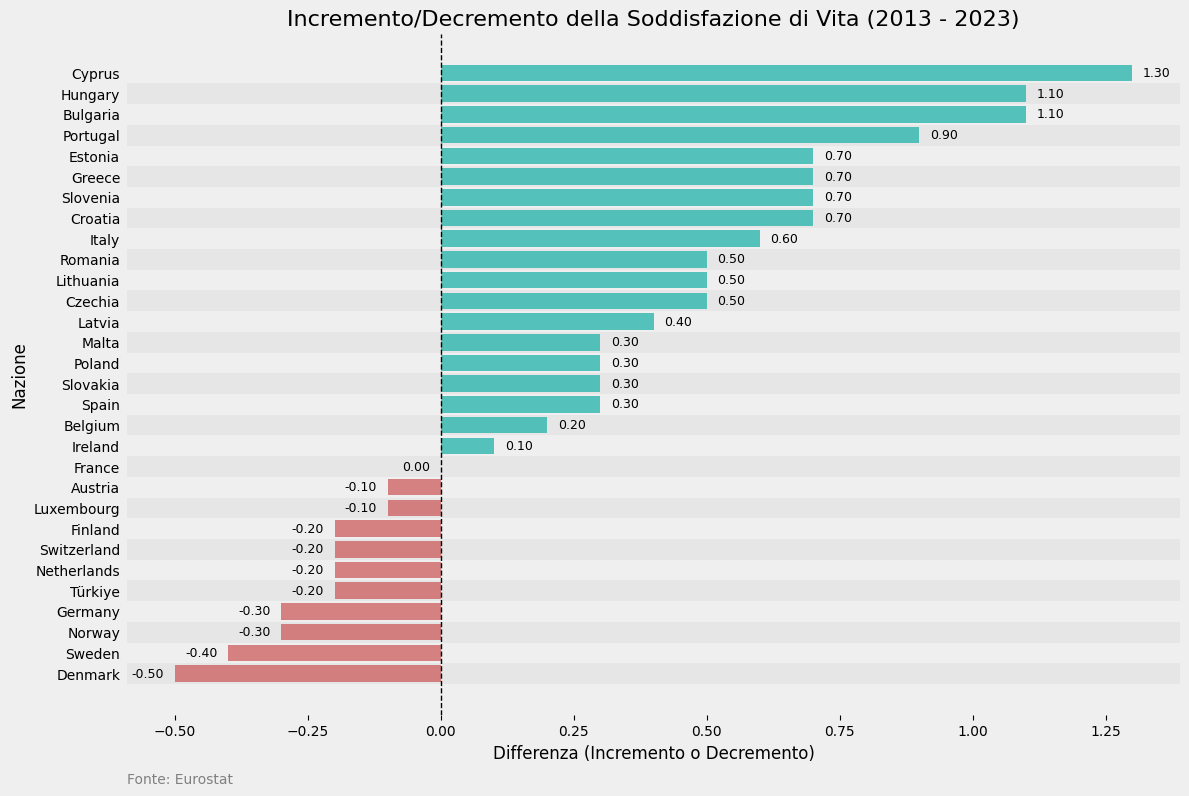

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Trova il dato più vecchio e più recente per ciascun Paese
latest_year = df['TIME_PERIOD'].max()
earliest_year = df['TIME_PERIOD'].min()

initial_values = df[df['TIME_PERIOD'] == earliest_year].set_index('geo')['OBS_VALUE']
latest_values = df[df['TIME_PERIOD'] == latest_year].set_index('geo')['OBS_VALUE']

# Calcola l'incremento/decremento
difference = latest_values - initial_values
difference = difference.dropna().sort_values()

# Colori desaturati
desaturated_red = to_rgba("indianred", alpha=0.75)
desaturated_green = to_rgba("lightseagreen", alpha=0.75)

# Creazione del grafico a barre orizzontali
fig, ax = plt.subplots(figsize=(12, 8))

# Aggiunta di strisce orizzontali
for i in range(len(difference)):
    if i % 2 == 0:  # Strisce alternate
        ax.axhspan(i - 0.5, i + 0.5, facecolor="lightgray", alpha=0.3)

bars = ax.barh(
    difference.index, 
    difference, 
    color=[desaturated_red if x < 0 else desaturated_green for x in difference]
)

# Annotazione dei valori sulle barre
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.02 if width > 0 else width - 0.02,  # Posizione del testo
        bar.get_y() + bar.get_height() / 2,  # Centra il testo verticalmente
        f"{width:.2f}",  # Valore arrotondato a due cifre decimali
        va='center',
        ha='left' if width > 0 else 'right',  # Allinea il testo rispetto alla barra
        fontsize=9
    )

# Rimuovi i tick dall'asse Y, ma lascia le etichette
ax.tick_params(axis='y', which='both', length=0)  # Imposta la lunghezza dei tick a 0

# Rimozione dei bordi del grafico
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Configura il grafico
ax.set_title(f'Incremento/Decremento della Soddisfazione di Vita ({earliest_year} - {latest_year})', fontsize=16)
ax.set_xlabel('Differenza (Incremento o Decremento)', fontsize=12)
ax.set_ylabel('Nazione', fontsize=12)
ax.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Linea verticale per zero

# Migliora lo spazio tra le etichette delle nazioni e le barre
ax.tick_params(axis='y', labelsize=10, pad=5)

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#efefef")

plt.text(
    0, -0.1,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)


plt.tight_layout()
plt.show()
